<a href="https://colab.research.google.com/github/cweinreich24/machine_learning_models/blob/master/Reuters_Dataset_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from keras.datasets import reuters

In [46]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [47]:
#Lets understand our data
print("There are " + str(len(train_data)) + " training examples in our dataset.")
print("There are " + str(len(test_data)) + " test examples in our dataset.")

print("There are " + str(len(train_labels)) + " test data points in our dataset.")
print("There are " + str(len(test_labels)) + " test labels in our dataset.")

There are 8982 training examples in our dataset.
There are 2246 test examples in our dataset.
There are 8982 test data points in our dataset.
There are 2246 test labels in our dataset.


In [48]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [49]:
train_labels[10]

3

In [50]:
#Lets decocde the data
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

In [51]:
print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [52]:
#Vectorize our data before building our network to feed the data into
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [53]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [54]:
print(x_train.shape)

(8982, 10000)


In [55]:
print(x_test.shape)

(2246, 10000)


In [56]:
#we can also use the built in keras fucntion "to_categorical" to encode our train and test labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [57]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
print(one_hot_train_labels.shape)

(8982, 46)


In [59]:
print(one_hot_test_labels.shape)

(2246, 46)


Building our Network


In [60]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Compiling the model

In [61]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Creating a validation set

In [63]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [64]:
print(x_val.shape)

(1000, 10000)


In [67]:
print(partial_x_train.shape)

(7982, 10000)


In [69]:
print(y_val.shape)

(1000, 46)


In [70]:
print(partial_y_train.shape)

(7982, 46)


Training Our Model

In [72]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.5597 - accuracy: 0.4500 - val_loss: 1.7024 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4154 - accuracy: 0.7002 - val_loss: 1.3076 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0611 - accuracy: 0.7677 - val_loss: 1.1555 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8402 - accuracy: 0.8175 - val_loss: 1.0403 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6763 - accuracy: 0.8514 - val_loss: 0.9814 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5391 - accuracy: 0.8845 - val_loss: 0.9225 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4342 - accuracy: 0.9092 - val_loss: 0.9001 - val_accuracy: 0.8170
Epoch 8/20
16

Visualizing our training and validation loss

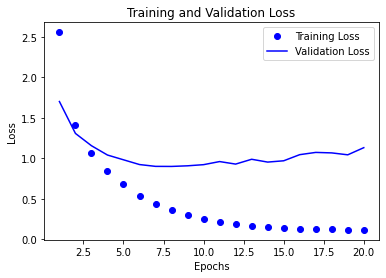

In [73]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Visualizing our Training and Validation Accuracy

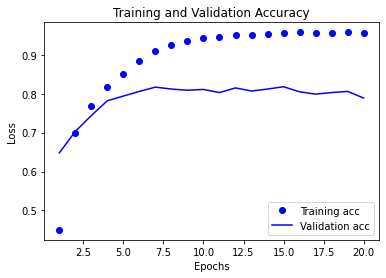

In [78]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

After 9 Epochs, we can see our model begins to Overfit

Lets retrain a new model from the ground up

In [83]:
model = models.Sequential()

In [86]:
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [87]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 2.5520 - accuracy: 0.5045 - val_loss: 1.6790 - val_accuracy: 0.6290
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4291 - accuracy: 0.6834 - val_loss: 1.3203 - val_accuracy: 0.6890
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0903 - accuracy: 0.7477 - val_loss: 1.1649 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8628 - accuracy: 0.8115 - val_loss: 1.0853 - val_accuracy: 0.7510
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6921 - accuracy: 0.8482 - val_loss: 0.9968 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5553 - accuracy: 0.8807 - val_loss: 0.9992 - val_accuracy: 0.7820
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4365 - accuracy: 0.9103 - val_loss: 0.9927 - val_accuracy: 0.7900
Epoch 8/9
16/16 [===

In [89]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 2ms/step - loss: 1.0729 - accuracy: 0.7814


[1.0729379653930664, 0.7813891172409058]

Generating Predictions

In [90]:
predictions = model.predict(x_test)

In [91]:
print(predictions)

[[2.8986271e-04 1.0289417e-04 6.9716749e-05 ... 2.6456626e-05
  2.7078526e-05 2.6619878e-06]
 [7.5506547e-04 6.1147199e-03 4.8793450e-02 ... 1.2452072e-03
  6.2123610e-07 9.0383721e-05]
 [1.0221623e-02 8.4038448e-01 1.4724071e-03 ... 6.0397532e-04
  1.8423991e-06 3.0086713e-04]
 ...
 [9.2488117e-05 4.5753596e-04 4.5533776e-05 ... 1.3886540e-05
  4.8332760e-05 2.8386562e-06]
 [8.2677864e-03 3.4111485e-01 9.5262518e-03 ... 1.1422020e-02
  1.3620068e-03 1.3422995e-03]
 [1.6855650e-03 6.9785619e-01 2.0868165e-02 ... 1.2205424e-03
  4.7225499e-06 1.2624894e-04]]


In [92]:
print(predictions[0].shape)

(46,)


In [93]:
#Sum up the coefficients
np.sum(predictions[0])

1.0

In [94]:
#The class with the highest probability
np.argmax(predictions[0])

3